In [1]:
from ase.io import read
import numpy as np
from aseMolec import pltProps as pp
from aseMolec import extAtoms as ea
from matplotlib import pyplot as plt

#load the output file
REF_energies = {}
MACE_energies = {}
REF_forces = {}
MACE_forces = {}
Test_REF_eng = {}
Test_MACE_eng = {}
Test_REF_f = {}
Test_MACE_f = {}


for i in range(4):
    dat = read(f"Outputs/prediction{i}_PBE0.xyz", ":") 
    REF_energies[f'REF{i}_energy'] = ea.get_prop(dat, 'info', f'REF{i}_energy', True)
    MACE_energies[f'MACE{i}_energy'] = ea.get_prop(dat, 'info', f'MACE{i}_energy', True)
    REF_forces[f'REF{i}_forces'] = np.concatenate(ea.get_prop(dat, 'arrays', f'REF{i}_forces')).flatten()
    MACE_forces[f'MACE{i}_forces'] = np.concatenate(ea.get_prop(dat, 'arrays', f'MACE{i}_forces')).flatten()

for i in range(4):
    test_dat = read(f"Outputs/prediction{i}_PBE0_test.xyz", ":")
    Test_REF_eng[f'Test_REF{i}_energy'] = ea.get_prop(test_dat, 'info', f'REF{i}_energy', True)
    Test_MACE_eng[f'Test_MACE{i}_energy'] = ea.get_prop(test_dat, 'info', f'MACE{i}_energy', True)
    Test_REF_f[f'Test_REF{i}_forces'] = np.concatenate(ea.get_prop(test_dat, 'arrays', f'REF{i}_forces')).flatten()
    Test_MACE_f[f'Test_MACE{i}_forces'] = np.concatenate(ea.get_prop(test_dat, 'arrays', f'MACE{i}_forces')).flatten()


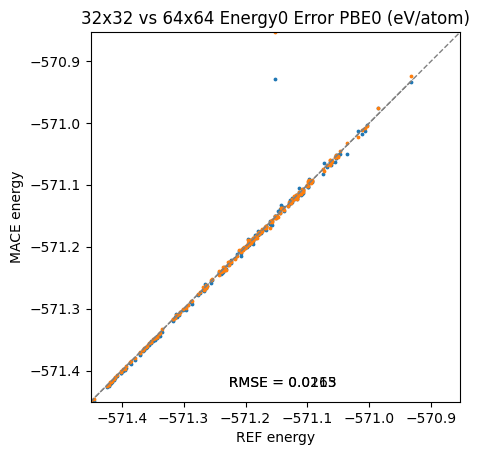

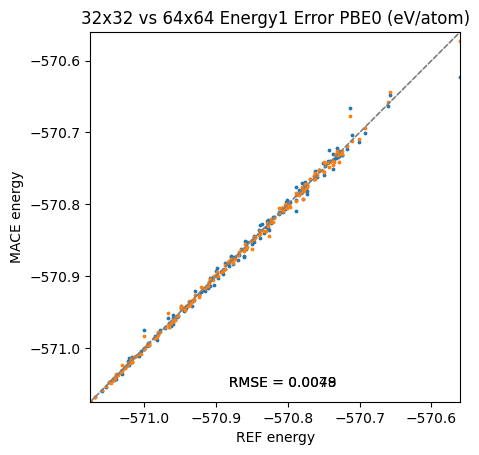

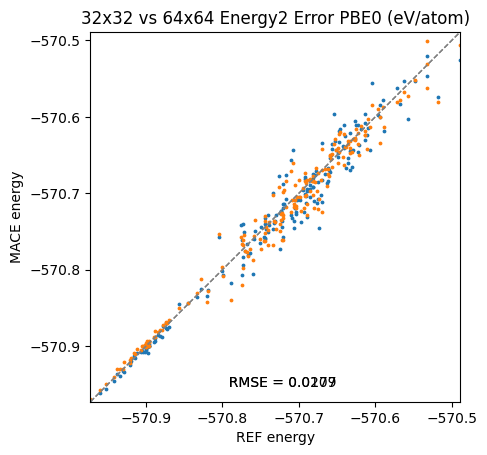

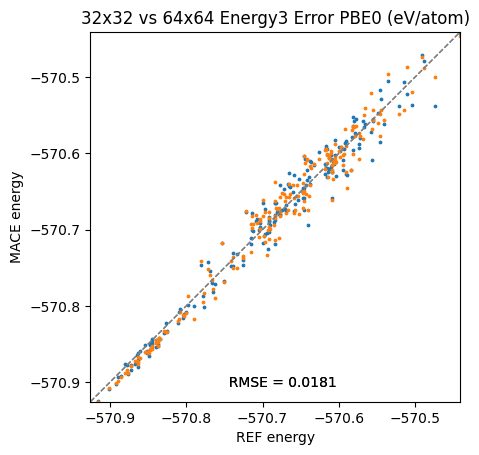

In [2]:
# Correlation plot for real vs predicted energies
figs = []
for i in range (4):
    fig = pp.plot_prop(REF_energies[f'REF{i}_energy'], MACE_energies[f'MACE{i}_energy'], title= f"Training Energy{i} Error PBE0 (eV/atom)", labs=["REF energy", "MACE energy"])
    fig = pp.plot_prop(Test_REF_eng[f'Test_REF{i}_energy'], Test_MACE_eng[f'Test_MACE{i}_energy'], title= f"32x32 vs 64x64 Energy{i} Error PBE0 (eV/atom)", labs=["REF energy", "MACE energy"])
    figs.append(fig)
    plt.show()
    

In [3]:
#from matplotlib import pyplot as plt

# Find the anomaly conformations
#err = np.abs(Test_REF['Test_REF0_energy']- Test_MACE['Test_MACE0_energy'])
#plt.plot(err)
#idx = np.where(err>0.06)
#print(idx)

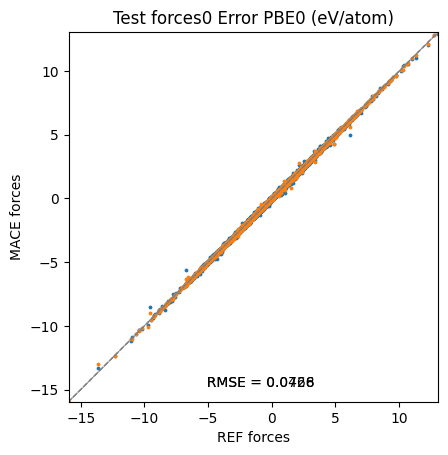

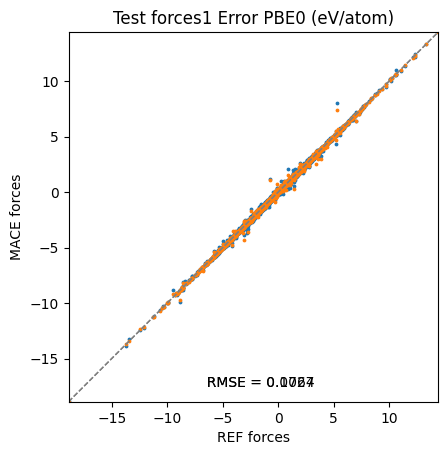

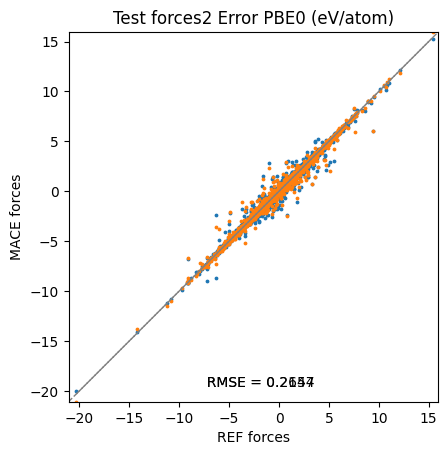

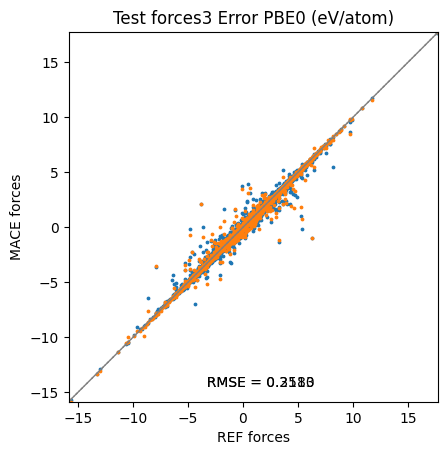

In [4]:
figs = []
for i in range (4):
    fig = pp.plot_prop(REF_forces[f'REF{i}_forces'], MACE_forces[f'MACE{i}_forces'], title= f"Training forces{i} Error PBE0 (eV/atom)", labs=["REF forces", "MACE forces"])
    fig = pp.plot_prop(Test_REF_f[f'Test_REF{i}_forces'], Test_MACE_f[f'Test_MACE{i}_forces'], title= f"Test forces{i} Error PBE0 (eV/atom)", labs=["REF forces", "MACE forces"])
    figs.append(fig)
    plt.show()